<a href="https://colab.research.google.com/github/akaboyo/customer-segmentation-project/blob/main/Customer_Segmentation_Analysis_with_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S R
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

DATA_SOURCE_MAPPING = 'quantium-data-analytics-project-with-r:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5899852%2F9657559%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241028%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241028T120313Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D7b93481cbc72f316ce49444ddd462a1d88b376d497c24a715e8a7fdd95449988ae00474cca9b882f247df6d2d50b65fe01d5e8b3850ab02d56337568723ea7b9044f3480b43767e775d567a6a5a31760b5ac55b90a765bf474ac189fdb3620f145e4e85e6b3594204179eb58a44694812a9e25170846594249454ac73ea6fe24f5fea4ab2e00f86003d8843b1d99d54550eda39863a80de7efeb333350857a1acc8a3921e325e48937bbf38e6ac9396189161d02cc730f9f70272f49ffacbf892397a49f9297830dd0a85010c71c7beabe5b0f76bcb89c8750f95260daea59439b6561d8e0fcca3ff503ff93904d9793bfbffd78c83a8c4ee72ee13a3c60bedc'

KAGGLE_INPUT_PATH = '/kaggle/input'
KAGGLE_WORKING_PATH = '/kaggle/working'

system(paste0('sudo umount ', '/kaggle/input'))
system(paste0('sudo rmdir ', '/kaggle/input'))
system(paste0('sudo mkdir -p -- ', KAGGLE_INPUT_PATH), intern=TRUE)
system(paste0('sudo chmod 777 ', KAGGLE_INPUT_PATH), intern=TRUE)
system(
  paste0('sudo ln -sfn ', KAGGLE_INPUT_PATH,' ',file.path('..', 'input')),
  intern=TRUE)

system(paste0('sudo mkdir -p -- ', KAGGLE_WORKING_PATH), intern=TRUE)
system(paste0('sudo chmod 777 ', KAGGLE_WORKING_PATH), intern=TRUE)
system(
  paste0('sudo ln -sfn ', KAGGLE_WORKING_PATH, ' ', file.path('..', 'working')),
  intern=TRUE)

data_source_mappings = strsplit(DATA_SOURCE_MAPPING, ',')[[1]]
for (data_source_mapping in data_source_mappings) {
    path_and_url = strsplit(data_source_mapping, ':')
    directory = path_and_url[[1]][1]
    download_url = URLdecode(path_and_url[[1]][2])
    filename = sub("\\?.+", "", download_url)
    destination_path = file.path(KAGGLE_INPUT_PATH, directory)
    print(paste0('Downloading and uncompressing: ', directory))
    if (endsWith(filename, '.zip')){
      temp = tempfile(fileext = '.zip')
      download.file(download_url, temp)
      unzip(temp, overwrite = TRUE, exdir = destination_path)
      unlink(temp)
    }
    else{
      temp = tempfile(fileext = '.tar')
      download.file(download_url, temp)
      untar(temp, exdir = destination_path)
      unlink(temp)
    }
    print(paste0('Downloaded and uncompressed: ', directory))
}

print(paste0('Data source import complete'))


character(0)

character(0)

character(0)

character(0)

character(0)

character(0)

[1] "Downloading and uncompressing: quantium-data-analytics-project-with-r"
[1] "Downloaded and uncompressed: quantium-data-analytics-project-with-r"
[1] "Data source import complete"


In [ ]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "quantium-data-analytics-project-with-r"

# Project Objective
The goal of this analysis is to uncover key insights into customer purchasing behaviors within the chips category, using segmentation based on LIFESTAGE and PREMIUM_CUSTOMER attributes. The insights will provide actionable recommendations to Julia, the Category Manager, as she prepares for the upcoming category review. By identifying high-value customer segments, understanding their preferences, and pinpointing sales drivers, the analysis will inform targeted strategies to optimize product offerings, promotions, and pricing, ultimately driving revenue growth and customer engagement.

# Load necessary libraries

To install the necessary libraries and load the datasets, We will use readxl to load the Excel file while the read.csv function will be used to load the CSV file.

In [ ]:
# Install necessary packages if you haven't already
install.packages("readxl")  # For reading Excel files

# Load the required libraries
library(readxl)

# Load the Excel transaction data
transaction_data <- read_excel("/kaggle/input/quantium-data-analytics-project-with-r/QVI_transaction_data.xlsx")

# Load the CSV customer purchase behavior data
purchase_data <- read.csv("/kaggle/input/quantium-data-analytics-project-with-r/QVI_purchase_behaviour.csv")

# Display the first few rows of each dataset to check if loaded correctly
head(transaction_data)
head(purchase_data)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
,<int>,<chr>,<chr>
1,1000,YOUNG SINGLES/COUPLES,Premium
2,1002,YOUNG SINGLES/COUPLES,Mainstream
3,1003,YOUNG FAMILIES,Budget
4,1004,OLDER SINGLES/COUPLES,Mainstream
5,1005,MIDAGE SINGLES/COUPLES,Mainstream
6,1007,YOUNG SINGLES/COUPLES,Budget


# Basic Structure and Summary
Once the datasets are loaded, i checked their structure and summarize them

In [ ]:
# Check the structure of both datasets
str(transaction_data)
str(purchase_data)

tibble [264,836 × 8] (S3: tbl_df/tbl/data.frame)
 $ DATE          : num [1:264836] 43390 43599 43605 43329 43330 ...
 $ STORE_NBR     : num [1:264836] 1 1 1 2 2 4 4 4 5 7 ...
 $ LYLTY_CARD_NBR: num [1:264836] 1000 1307 1343 2373 2426 ...
 $ TXN_ID        : num [1:264836] 1 348 383 974 1038 ...
 $ PROD_NBR      : num [1:264836] 5 66 61 69 108 57 16 24 42 52 ...
 $ PROD_NAME     : chr [1:264836] "Natural Chip        Compny SeaSalt175g" "CCs Nacho Cheese    175g" "Smiths Crinkle Cut  Chips Chicken 170g" "Smiths Chip Thinly  S/Cream&Onion 175g" ...
 $ PROD_QTY      : num [1:264836] 2 3 2 5 3 1 1 1 1 2 ...
 $ TOT_SALES     : num [1:264836] 6 6.3 2.9 15 13.8 5.1 5.7 3.6 3.9 7.2 ...
'data.frame':	72637 obs. of  3 variables:
 $ LYLTY_CARD_NBR  : int  1000 1002 1003 1004 1005 1007 1009 1010 1011 1012 ...
 $ LIFESTAGE       : chr  "YOUNG SINGLES/COUPLES" "YOUNG SINGLES/COUPLES" "YOUNG FAMILIES" "OLDER SINGLES/COUPLES" ...
 $ PREMIUM_CUSTOMER: chr  "Premium" "Mainstream" "Budget" "Mainstream" ...

# Check the number of rows and columns for each dataset

In [ ]:
dim(transaction_data)
dim(purchase_data)

[1] 264836      8

[1] 72637     3

# Data Cleaning
Transaction Data: Look for and correct missing values, outliers, and format inconsistencies in numeric and categorical columns.

Customer Data: Similar checks will be done for customer data, with a focus on attributes like LIFESTAGE and PREMIUM_CUSTOMER.

After cleaning, i will merge the datasets for a comprehensive view.

In [ ]:
# Check for missing values in transaction data
sum(is.na(transaction_data))
sum(is.na(purchase_data))

# Display columns with missing values (if any)
colSums(is.na(transaction_data))

# Remove rows with missing values
transaction_data <- transaction_data %>% drop_na()
purchase_data <- purchase_data %>% drop_na()

[1] 0

[1] 0

DATE      STORE_NBR LYLTY_CARD_NBR         TXN_ID       PROD_NBR 
             0              0              0              0              0 
     PROD_NAME       PROD_QTY      TOT_SALES 
             0              0              0

In [ ]:
# Check summary statistics of the TOT_SALES column
summary(transaction_data$TOT_SALES)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.500   5.400   7.400   7.304   9.200 650.000 

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 <- quantile(transaction_data$TOT_SALES, 0.25, na.rm = TRUE)
Q3 <- quantile(transaction_data$TOT_SALES, 0.75, na.rm = TRUE)

# Calculate the interquartile range (IQR)
IQR <- Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound <- Q1 - 1.5 * IQR
upper_bound <- Q3 + 1.5 * IQR

# Print the bounds
print(paste("Lower Bound:", lower_bound))
print(paste("Upper Bound:", upper_bound))


[1] "Lower Bound: -0.299999999999998"
[1] "Upper Bound: 14.9"


In [ ]:
# Filter the data to remove rows with outliers in TOT_SALES
transaction_data_clean <- transaction_data %>%
  filter(TOT_SALES >= lower_bound & TOT_SALES <= upper_bound)

# Check the summary after removing outliers
summary(transaction_data_clean$TOT_SALES)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.500   5.400   7.400   7.272   8.800  14.800 

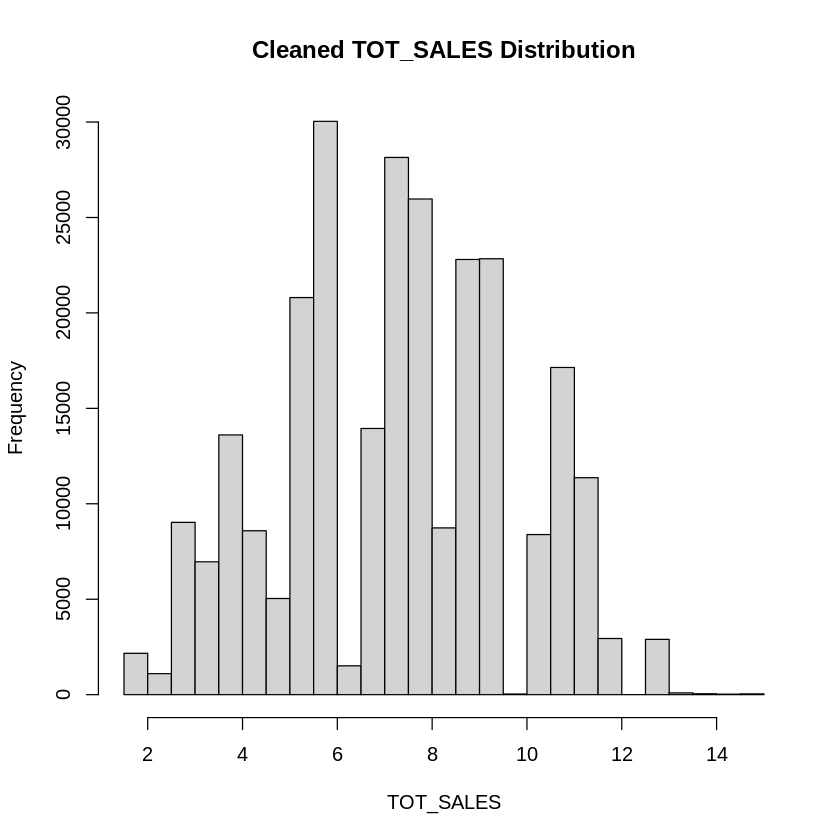

In [ ]:
# Histogram to visualize the cleaned TOT_SALES data
hist(transaction_data_clean$TOT_SALES, main = "Cleaned TOT_SALES Distribution", xlab = "TOT_SALES", breaks = 30)


# Correcting Format Inconsistencies:
Ensure numeric and categorical columns have the correct data types.

In [ ]:
# Convert the 'DATE' column to datetime format
transaction_data$DATE <- as.Date(transaction_data$DATE, format="%Y-%m-%d")

In [ ]:
# Check the structure of both datasets (cleaned)
str(transaction_data)
str(purchase_data)

tibble [264,836 × 8] (S3: tbl_df/tbl/data.frame)
 $ DATE          : Date[1:264836], format: "2088-10-18" "2089-05-15" ...
 $ STORE_NBR     : num [1:264836] 1 1 1 2 2 4 4 4 5 7 ...
 $ LYLTY_CARD_NBR: num [1:264836] 1000 1307 1343 2373 2426 ...
 $ TXN_ID        : num [1:264836] 1 348 383 974 1038 ...
 $ PROD_NBR      : num [1:264836] 5 66 61 69 108 57 16 24 42 52 ...
 $ PROD_NAME     : chr [1:264836] "Natural Chip        Compny SeaSalt175g" "CCs Nacho Cheese    175g" "Smiths Crinkle Cut  Chips Chicken 170g" "Smiths Chip Thinly  S/Cream&Onion 175g" ...
 $ PROD_QTY      : num [1:264836] 2 3 2 5 3 1 1 1 1 2 ...
 $ TOT_SALES     : num [1:264836] 6 6.3 2.9 15 13.8 5.1 5.7 3.6 3.9 7.2 ...
'data.frame':	72637 obs. of  3 variables:
 $ LYLTY_CARD_NBR  : int  1000 1002 1003 1004 1005 1007 1009 1010 1011 1012 ...
 $ LIFESTAGE       : chr  "YOUNG SINGLES/COUPLES" "YOUNG SINGLES/COUPLES" "YOUNG FAMILIES" "OLDER SINGLES/COUPLES" ...
 $ PREMIUM_CUSTOMER: chr  "Premium" "Mainstream" "Budget" "Mainstream

# Merge the Cleaned Datasets:
After cleaning both datasets, we can merge them for further analysis using the LYLTY_CARD_NBR column as unique identifiers.

In [ ]:
# Merge the cleaned datasets using the LYLTY_CARD_NBR column as unique identifiers.
merged_data <- merge(transaction_data, purchase_data, by = "LYLTY_CARD_NBR", all = TRUE)

# Preview the merged data
head(merged_data)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,1000,2088-10-18,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
2,1002,2088-09-17,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,YOUNG SINGLES/COUPLES,Mainstream
3,1003,2089-03-08,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,YOUNG FAMILIES,Budget
4,1003,2089-03-09,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,YOUNG FAMILIES,Budget
5,1004,2088-11-03,1,5,96,WW Original Stacked Chips 160g,1,1.9,OLDER SINGLES/COUPLES,Mainstream
6,1005,2088-12-29,1,6,86,Cheetos Puffs 165g,1,2.8,MIDAGE SINGLES/COUPLES,Mainstream


# Further Analysis: (Deriving Pack Size and Brand Name)
I want to derive extra features such as pack size and brand name from the data and define metrics of interest to enable you to draw insights on who spends on chips and what drives spends for each customer segment.

- Pack Size: We use a regular expression gsub("[^0-9]", "", PROD_NAME) to extract numeric values from the product name, which typically represent the pack size
  
- Brand Name: We assume the first word of the product name is the brand

In [ ]:
# Load required library
library(dplyr)

# 1. Derive Pack Size from PROD_NAME
merged_data$PACK_SIZE <- as.numeric(gsub("[^0-9]", "", merged_data$PROD_NAME))

# 2. Derive Brand Name from PROD_NAME
merged_data$BRAND_NAME <- sub(" .*", "", merged_data$PROD_NAME)

# 3. Check the results
head(merged_data[, c("PROD_NAME", "PACK_SIZE", "BRAND_NAME")])


,PROD_NAME,PACK_SIZE,BRAND_NAME
,<chr>,<dbl>,<chr>
1,Natural Chip Compny SeaSalt175g,175,Natural
2,Red Rock Deli Chikn&Garlic Aioli 150g,150,Red
3,Grain Waves Sour Cream&Chives 210G,210,Grain
4,Natural ChipCo Hony Soy Chckn175g,175,Natural
5,WW Original Stacked Chips 160g,160,WW
6,Cheetos Puffs 165g,165,Cheetos


# Defining Metrics
I defined metrics on who spends on chips and what drives spends for each customer segment.

In [ ]:
# Define metrics: Total sales, number of transactions, and average spend per brand
brand_metrics <- merged_data %>%
  group_by(BRAND_NAME) %>%
  summarise(
    Total_Sales = sum(TOT_SALES, na.rm = TRUE),
    Transactions = n(),
    Avg_Spend_Per_Transaction = mean(TOT_SALES, na.rm = TRUE)
  )

# View the summary
head(brand_metrics)

BRAND_NAME,Total_Sales,Transactions,Avg_Spend_Per_Transaction
<chr>,<dbl>,<int>,<dbl>
Burger,6831.0,1564,4.367647
CCs,18078.9,4551,3.972512
Cheetos,16884.5,2927,5.768534
Cheezels,40029.9,4603,8.696481
Cobs,70569.8,9693,7.280491
Dorito,40352.0,3185,12.669388


# Customer segmentation Analysis
I performed a deep dive into customer segments using LIFESTAGE and PREMIUM_CUSTOMER columns.
I also identified high-value segments based on chip purchasing behavior.

This analysis will help us understand purchasing patterns based on different life stages and customer premium status, leading to actionable insights.

# Steps for Deep Dive:
- Group by LIFESTAGE and PREMIUM_CUSTOMER: We'll summarize total sales, average transaction size, and total number of transactions for each segment.
- Identify High-Value Segments: We can define high-value segments as those with the highest total sales or the highest average spend per customer.
- Visualize the Findings: Create visualizations to make the insights clear.

`summarise()` has grouped output by 'LIFESTAGE'. You can override using the
`.groups` argument.


LIFESTAGE,PREMIUM_CUSTOMER,Total_Sales,Avg_Transaction_Size,Transaction_Count
<chr>,<chr>,<dbl>,<dbl>,<int>
OLDER FAMILIES,Budget,168363.2,7.269570,23160
YOUNG SINGLES/COUPLES,Mainstream,157621.6,7.558339,20854
RETIREES,Mainstream,155677.0,7.252262,21466
YOUNG FAMILIES,Budget,139345.9,7.287201,19122
OLDER SINGLES/COUPLES,Budget,136769.8,7.430315,18407
OLDER SINGLES/COUPLES,Mainstream,133393.8,7.282116,18318


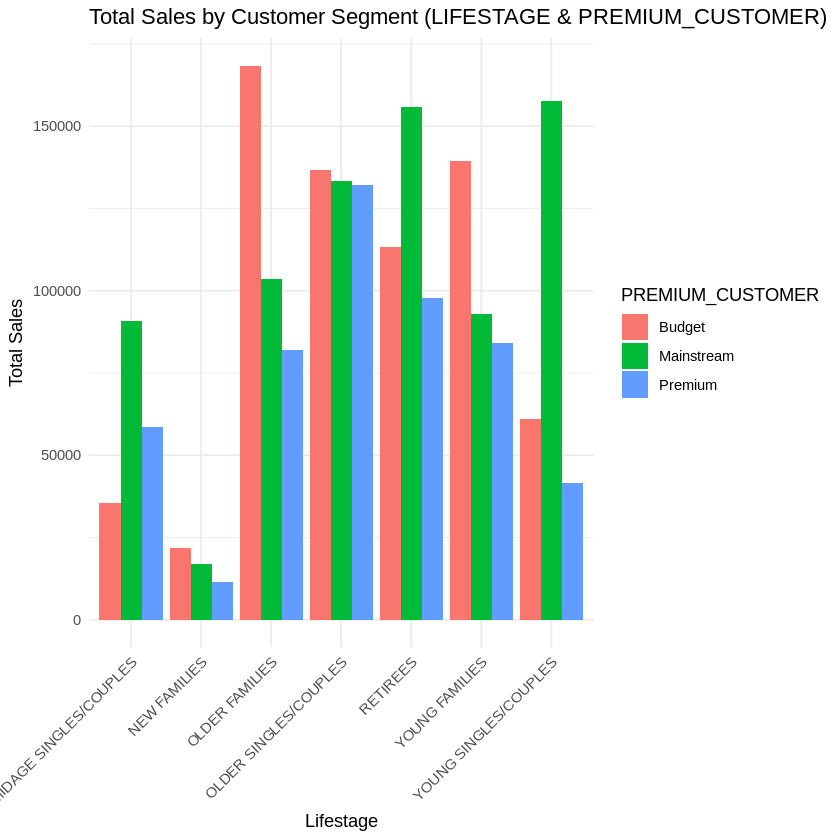

In [ ]:
# Load necessary libraries
library(ggplot2)

# Summarize data by LIFESTAGE and PREMIUM_CUSTOMER
segment_analysis <- merged_data  %>%
  group_by(LIFESTAGE, PREMIUM_CUSTOMER) %>%
  summarise(
    Total_Sales = sum(TOT_SALES, na.rm = TRUE),
    Avg_Transaction_Size = mean(TOT_SALES, na.rm = TRUE),
    Transaction_Count = n()
  ) %>%
  arrange(desc(Total_Sales))

# View the segment analysis summary
head(segment_analysis)

# Identify high-value segments by highest Total_Sales and Avg_Transaction_Size
high_value_segments <- segment_analysis %>%
  filter(Total_Sales > quantile(Total_Sales, 0.75) | Avg_Transaction_Size > quantile(Avg_Transaction_Size, 0.75))

# Visualize total sales by LIFESTAGE and PREMIUM_CUSTOMER with wider bars and slanted x-axis labels
ggplot(segment_analysis, aes(x = LIFESTAGE, y = Total_Sales, fill = PREMIUM_CUSTOMER)) +
  geom_bar(stat = "identity", position = "dodge", width = 0.9) +  # Adjust bar width here
  labs(title = "Total Sales by Customer Segment (LIFESTAGE & PREMIUM_CUSTOMER)",
       x = "Lifestage", y = "Total Sales") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))



# Insights:
- By focusing on these high-value segments, i identified Older Families and Young Singles/Coulples as the top 2 customer segments who are Budget and Mainstream Premium customers respectively, that contribute the most to chip sales.
- This analysis will provide the Category Manager (Julia) with clear, actionable insights for the category review, allowing her to target the most valuable segments for promotions or product offerings.